### Data Preparation
#### ERA5 Dataset

In [1]:
import xarray as xr

#### Vertical Wind Component

In [2]:
## Vertical Wind Component 5 years each from 2006 to 2020
wind_v_93_02 = xr.open_dataset('data/ERA5/V-component-of-wind_1993_2002.nc')
wind_v_03_12 = xr.open_dataset('data/ERA5/V-component-of-wind_2003_2012.nc')
wind_v_13_22 = xr.open_dataset('data/ERA5/V-component-of-wind_2013_2022.nc')

## merge data into one array
wind_vc = xr.concat([wind_v_93_02, wind_v_03_12, wind_v_13_22], dim = "time")

In [14]:
#wind_vc

In [12]:
# Extract data for the 200 hPa and 800 hPa levels
wind_200hpa = wind_vc.sel(level=200)  # 200 hPa level
wind_800hpa = wind_vc.sel(level=800)  # 800 hPa level

# Calculate vertical wind shear by subtracting values at 800 hPa from values at 200 hPa
vertical_wind_shear = wind_200hpa.v - wind_800hpa.v

In [15]:
#vertical_wind_shear

#### Precipitatlon Flux

In [17]:
## Precipitation Flux
precip = xr.open_dataset('data/ERA5/Total-precipitation.nc')

In [22]:
#precip

In [27]:
# Extract precipitation data
total_pr = precip.tp

In [29]:
#total_pr

### Exploratory Data Analysis (EDA):

In [31]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import os

### Create Directory for Saving Figures

In [33]:
import os

# Create a directory named 'figures' if it doesn't exist
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

# Create a directory named 'CMIP5' if it doesn't exist
save_dir = 'figures/ERA5'
os.makedirs(save_dir, exist_ok=True)

In [34]:
from plot_utils import plot_time_series

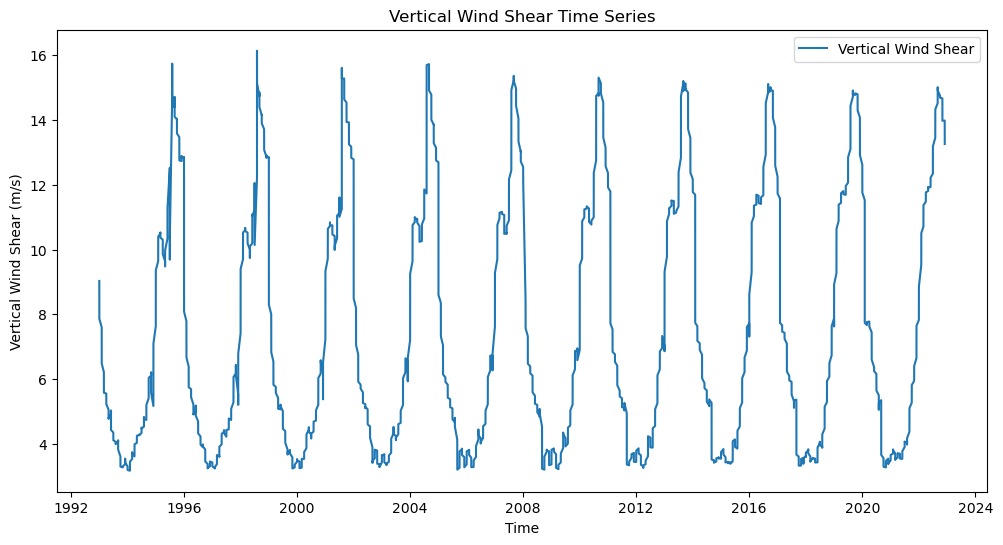

In [35]:
# Vertical Wind Shear
plot_time_series(vertical_wind_shear.time.values, vertical_wind_shear.values.flatten(), 'Vertical Wind Shear', save_dir,'m/s')

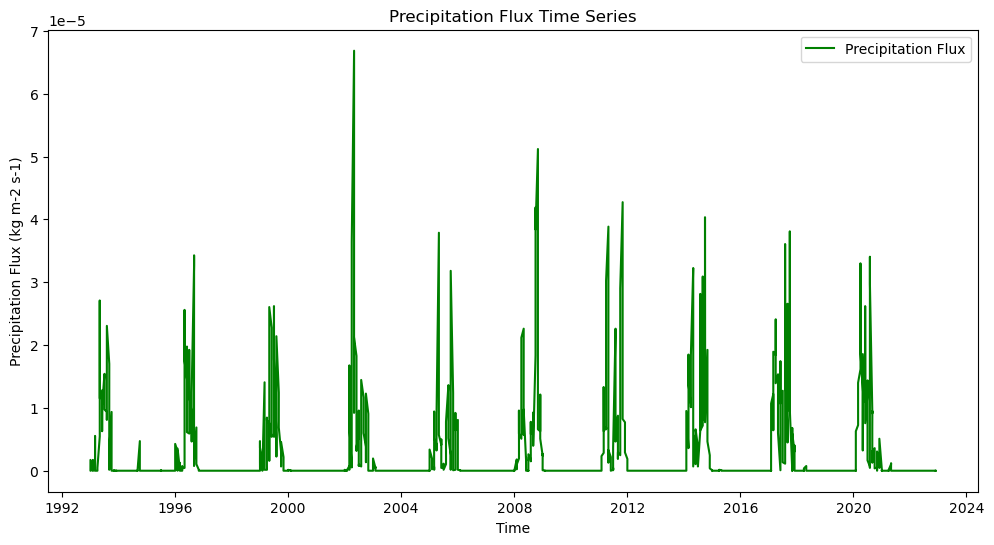

In [38]:
# Precipitation Flux
plot_time_series(pr_flux.time.values, pr_flux.values.flatten(), 'Precipitation Flux', save_dir, 'kg m-2 s-1', color='green')

In [39]:
from plot_utils import plot_dual_time_series

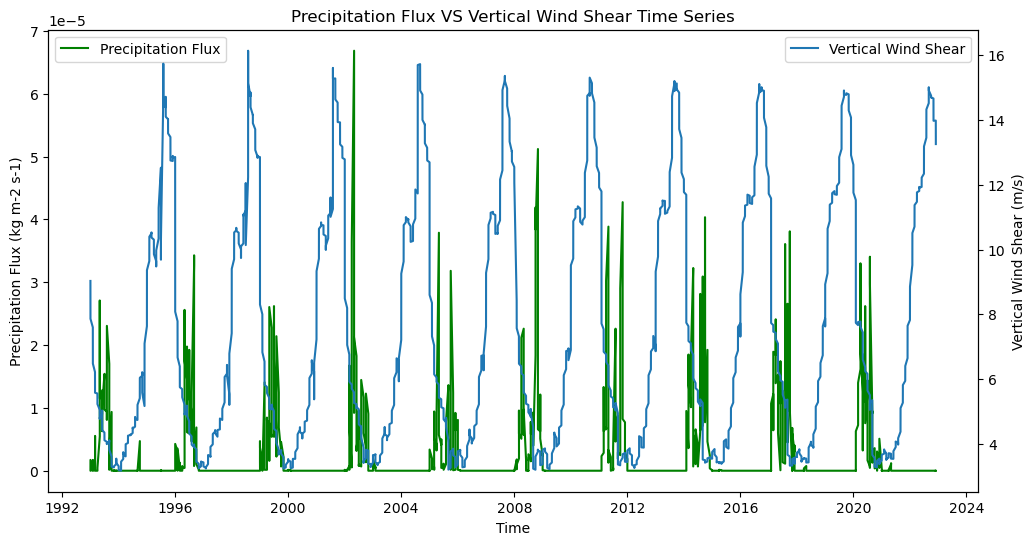

In [40]:
plot_dual_time_series(
    pr_flux.time.values, pr_flux.values.flatten(), 'Precipitation Flux', 'green',
    vertical_wind_shear.time.values, vertical_wind_shear.values.flatten(), 'Vertical Wind Shear', None,
    save_dir, unit_primary='kg m-2 s-1', unit_secondary='m/s'
)


### Investigate Temporal Patterns and Relationships:

In [43]:
from plot_utils import plot_correlation_heatmap

In [45]:
#plot_correlation_heatmap(pr_flux, vertical_wind_shear, save_dir, 'Precipitation Flux', 'Vertical Wind Shear')